In [122]:
%matplotlib inline
import _init_paths
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as patches
plt.rcParams["figure.figsize"] = [12, 9]

In [147]:
def get_mask_bbx(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return cmin, rmin, cmax, rmax

def draw_bbx(ax, bbx):
    # Create a Rectangle patch
    rect = patches.Rectangle((bbx[0],bbx[1]),bbx[2]-bbx[0],bbx[3]-bbx[1],linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

In [148]:
view0_img = cv2.imread('/home/abhijit/Workspace/RenderFor3Data/build/view_00.png', cv2.IMREAD_GRAYSCALE)
view0_img[view0_img >  0] = 255

view1_img = cv2.imread('/home/abhijit/Workspace/RenderFor3Data/build/view_01.png', cv2.IMREAD_GRAYSCALE)
view1_img[view1_img >  0] = 255

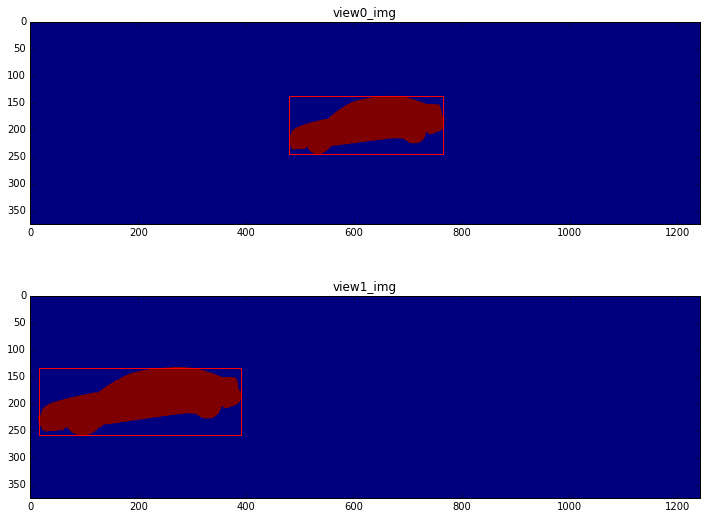

In [149]:
f, (ax0, ax1) = plt.subplots(2)

ax0.set_title('view0_img')
ax0.imshow(view0_img)
draw_bbx(ax0, get_mask_bbx(view0_img))

ax1.set_title('view1_img')
ax1.imshow(view1_img)
draw_bbx(ax1, get_mask_bbx(view1_img))

plt.show()

In [150]:
K = np.array([[721.5377,0.0,609.5593],[0.0,721.5377,172.854],[0.0,0.0,1.0]])
Kinv = np.linalg.inv(K)
print "K=\n", K
print "Kinv=\n", Kinv

K=
[[ 721.5377    0.      609.5593]
 [   0.      721.5377  172.854 ]
 [   0.        0.        1.    ]]
Kinv=
[[ 0.00138593  0.         -0.84480589]
 [ 0.          0.00138593 -0.23956337]
 [ 0.          0.          1.        ]]


In [151]:
from RenderAndCompare.geometry import rotation_from_viewpoint, rotation_from_two_vectors

In [152]:
vp = np.array([1.57079632679,0.01265,0.110868])
Rvp = rotation_from_viewpoint(vp)
print Rvp

[[ -9.93860436e-01   1.39957149e-03  -1.10632161e-01]
 [  1.10641013e-01   1.25719992e-02  -9.93780917e-01]
 [ -4.89619708e-12  -9.99919990e-01  -1.26496626e-02]]


In [153]:
cp0 = np.array([621.0,187.5, 1])
cp0_ray = Kinv.dot(cp0)
print cp0_ray
cp1 = np.array([221.0,187.5, 1])
cp1_ray = Kinv.dot(cp1)
print cp1_ray

[ 0.015856    0.02029832  1.        ]
[-0.53851559  0.02029832  1.        ]


In [154]:
R = rotation_from_two_vectors(cp1_ray, cp0_ray)
print R

[[ 0.87286716  0.00990268  0.48785741]
 [-0.00990268  0.99994764 -0.00257952]
 [-0.48785741 -0.00257952  0.87291952]]


In [155]:
H = K.dot(R).dot(Kinv)
print H

[[  4.60722343e-01   7.72349037e-03   6.01931104e+02]
 [ -1.26775448e-01   9.99329682e-01   5.35654307e+01]
 [ -6.76135723e-04  -3.57503106e-06   1.28568230e+00]]


In [156]:
dst = cv2.warpPerspective(view1_img, H, (1242,375), cv2.INTER_LANCZOS4)
diff = view0_img - dst

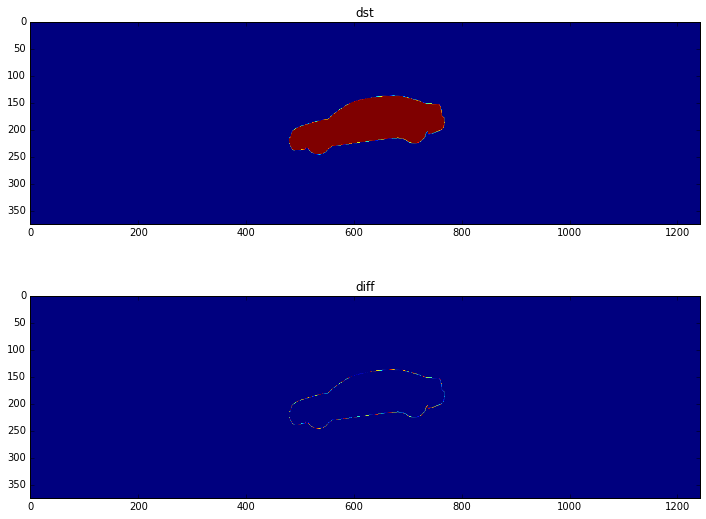

In [157]:
f, (ax0, ax1) = plt.subplots(2)

ax0.set_title('dst')
ax0.imshow(dst)

ax1.set_title('diff')
ax1.imshow(diff)

plt.show()

In [161]:
roi = get_mask_bbx(view1_img)

In [162]:
K_R = np.array([[K[0, 0] * 400 / (roi[2]-roi[0]), 0.0, 200.0],
                [0.0, K[1, 1] * 400 / (roi[3]-roi[1]), 200.0],
                [0.0, 0.0,1.0]])

print "K_R=\n", K_R

K_R=
[[  7.69640213e+02   0.00000000e+00   2.00000000e+02]
 [  0.00000000e+00   2.30892064e+03   2.00000000e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


[[ 0.88048047  0.00450506  0.47406101]
 [ 0.00450506  0.99983019 -0.01786882]
 [-0.47406101  0.01786882  0.88031066]]


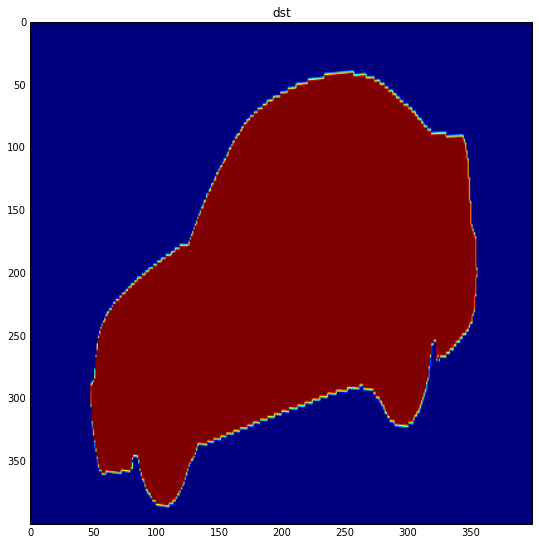

In [163]:
R = rotation_from_two_vectors(cp1_ray, np.array([0., 0., 1.]))
print R
H_R = K_R.dot(R).dot(Kinv)
dst = cv2.warpPerspective(view1_img, H_R, (400,400), cv2.INTER_LANCZOS4)
plt.title('dst')
plt.imshow(dst)
plt.show()

In [164]:
Kinv.dot([621.0,187.5, 1])

array([ 0.015856  ,  0.02029832,  1.        ])

In [165]:
K.dot([0,0, 1])

array([ 609.5593,  172.854 ,    1.    ])